# Clustering

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We will find clusters in the affairs data set

In [2]:
df = pd.read_csv('affairs.csv', index_col=0)

In [3]:
df = pd.get_dummies(columns=['occupation'],data=df)

In [4]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6
0,3,32.0,9.0,3.0,3,17,0.111111,0,1,0,0,0,0
1,3,27.0,13.0,3.0,1,14,3.230769,0,0,1,0,0,0
2,4,22.0,2.5,0.0,1,16,1.400000,0,0,1,0,0,0
3,4,37.0,16.5,4.0,3,16,0.727273,0,0,0,0,1,0
4,5,27.0,9.0,1.0,1,14,4.666666,0,0,1,0,0,0


In [5]:
len(df)

6366

In [6]:
df.dtypes

rate_marriage      int64
age              float64
yrs_married      float64
children         float64
religious          int64
educ               int64
affairs          float64
occupation_1       uint8
occupation_2       uint8
occupation_3       uint8
occupation_4       uint8
occupation_5       uint8
occupation_6       uint8
dtype: object

### Use KMeans to find 3 clusters

In [7]:
from sklearn.cluster import KMeans

In [8]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6
0,3,32.0,9.0,3.0,3,17,0.111111,0,1,0,0,0,0
1,3,27.0,13.0,3.0,1,14,3.230769,0,0,1,0,0,0
2,4,22.0,2.5,0.0,1,16,1.400000,0,0,1,0,0,0
3,4,37.0,16.5,4.0,3,16,0.727273,0,0,0,0,1,0
4,5,27.0,9.0,1.0,1,14,4.666666,0,0,1,0,0,0


In [9]:
clu = KMeans(n_clusters=3, random_state=0)

In [10]:
clu

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [11]:
clu.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [12]:
clu.labels_

array([2, 2, 0, ..., 0, 2, 0], dtype=int32)

### Getting summary information on the clusters' characteristics

In [13]:
df2 = df.copy()

In [14]:
df2['cluster']=clu.labels_

In [15]:
df2.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,cluster
0,3,32.0,9.0,3.0,3,17,0.111111,0,1,0,0,0,0,2
1,3,27.0,13.0,3.0,1,14,3.230769,0,0,1,0,0,0,2
2,4,22.0,2.5,0.0,1,16,1.400000,0,0,1,0,0,0,0
3,4,37.0,16.5,4.0,3,16,0.727273,0,0,0,0,1,0,1
4,5,27.0,9.0,1.0,1,14,4.666666,0,0,1,0,0,0,2


In [16]:
df2.groupby('cluster').mean()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6
cluster,,,,,,,,,,,,,
0,4.215116,24.095785,3.358430,0.496366,2.330814,14.348547,0.876362,0.009012,0.127616,0.458140,0.288372,0.100581,0.016279
1,3.945343,39.979215,20.461124,3.060431,2.649731,13.883757,0.394723,0.003849,0.120862,0.444958,0.260200,0.153195,0.016936
2,4.017824,30.927474,11.814382,1.972649,2.449293,14.177013,0.591874,0.003073,0.161647,0.386601,0.309773,0.119852,0.019053


In [17]:
import seaborn as sns

In [18]:
df2['young']= df2.age <=23

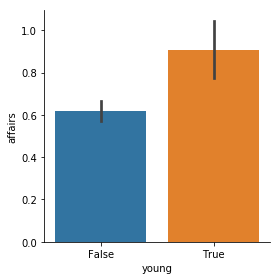

In [19]:
sns.factorplot(x='young',y='affairs',data=df2, kind='bar')

In [20]:
df2['binned_age'] = pd.cut(df2.age,bins=\
                        [0,20,24,30,40,50,100])

In [21]:
df2.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,cluster,young,binned_age
0,3,32.0,9.0,3.0,3,17,0.111111,0,1,0,0,0,0,2,False,"(30, 40]"
1,3,27.0,13.0,3.0,1,14,3.230769,0,0,1,0,0,0,2,False,"(24, 30]"
2,4,22.0,2.5,0.0,1,16,1.400000,0,0,1,0,0,0,0,True,"(20, 24]"
3,4,37.0,16.5,4.0,3,16,0.727273,0,0,0,0,1,0,1,False,"(30, 40]"
4,5,27.0,9.0,1.0,1,14,4.666666,0,0,1,0,0,0,2,False,"(24, 30]"


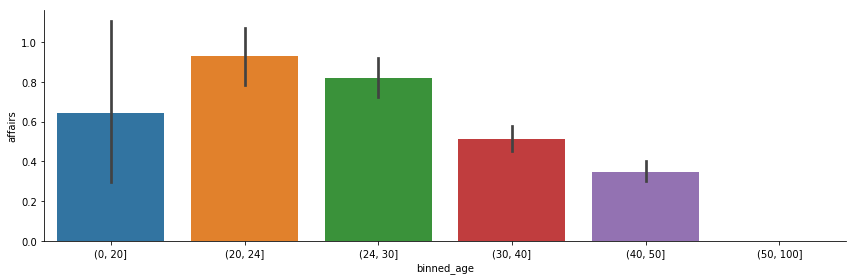

In [22]:
sns.factorplot(x='binned_age',y='affairs',\
               data=df2, kind='bar', aspect=3)

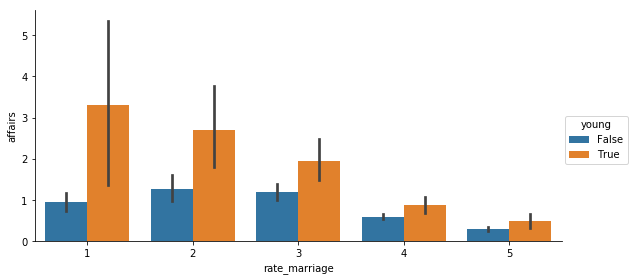

In [24]:
sns.factorplot(x='rate_marriage',y='affairs',hue='young',\
               data=df2, kind='bar',aspect=2)

### Anything that is highly correlated and can be dropped ?

In [25]:
df2.corr()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,cluster,young
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,-0.178068,0.017372,-0.019697,-0.053082,0.068882,-0.002109,0.008878,-0.098991,0.092806
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,-0.089964,-0.042701,-0.034223,-0.066371,0.040982,0.079533,0.030676,0.546924,-0.715754
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,-0.087737,-0.036117,0.004668,-0.021261,-0.026816,0.076820,-0.004912,0.612621,-0.579067
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.070278,-0.025718,0.081182,-0.063298,-0.003235,0.033274,-0.026830,0.522959,-0.477922
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,-0.125933,-0.012237,-0.013129,-0.034986,0.043996,0.004260,0.011784,0.077348,-0.066197
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,-0.017740,0.028309,-0.217719,-0.335615,0.477505,-0.022121,0.226920,-0.045259,-0.119411
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,1.000000,-0.010209,0.002542,0.019951,-0.043153,0.018080,0.029290,-0.065175,0.060863
occupation_1,0.017372,-0.042701,-0.036117,-0.025718,-0.012237,0.028309,-0.010209,1.000000,-0.031798,-0.070957,-0.051217,-0.029200,-0.010627,-0.033268,0.049119
occupation_2,-0.019697,-0.034223,0.004668,0.081182,-0.013129,-0.217719,0.002542,-0.031798,1.000000,-0.348075,-0.251243,-0.143237,-0.052128,0.037326,0.039321
occupation_3,-0.053082,-0.066371,-0.021261,-0.063298,-0.034986,-0.335615,0.019951,-0.070957,-0.348075,1.000000,-0.560645,-0.319631,-0.116322,-0.057838,0.113765


### Finding the best clustering method

In [26]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

bestSil = -1
for k in range(2,6):
    print ('k= %d ' % k)
    clus = [KMeans(n_clusters=k), Birch(n_clusters=k), AgglomerativeClustering(n_clusters=k)]
    #clus = [KMeans(n_clusters=k,n_jobs=-1)]
    for cl in clus:
        res = cl.fit(df)
        sil = metrics.silhouette_score(df, res.labels_)
        print (str(cl)[:6] + ' with k=' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl
            bestK = k
print('***********************************************')
print ('Best algorithm is... ' + str(bestCl)[:6] + '  with k=' +str(bestK) )
print('**********************')
print ('With Silhouette Score ' + str(bestSil))

k= 2 
KMeans with k=2: 0.5651
Birch( with k=2: 0.5569
Agglom with k=2: 0.5584
k= 3 
KMeans with k=3: 0.4233
Birch( with k=3: 0.4748
Agglom with k=3: 0.4781
k= 4 
KMeans with k=4: 0.3749
Birch( with k=4: 0.3602
Agglom with k=4: 0.3618
k= 5 
KMeans with k=5: 0.383
Birch( with k=5: 0.3441
Agglom with k=5: 0.3702
***********************************************
Best algorithm is... KMeans  with k=2
**********************
With Silhouette Score 0.5651278945170563


# Take-home exercise 

Open the <i>cleaned_survey.csv</i> data set.  Work with your project group members, find one interesting finding through clustering+seaborn

In [26]:
df = pd.read_csv('cleaned_survey.csv', index_col=0)

In [27]:
df.head()

,Job,Program,ProgSkills,C,CPP,CS,Java,Python,JS,R,...,Tableau,Regression,Classification,Clustering,Bach_0to1,Bach_1to3,Bach_3to5,Bach_5Plus,Languages,Expert
0,0.0,MSIS,4,1,1,0.0,1,1.0,1.0,0.0,...,0,1.0,4,4,0,1,0,0,6.0,1
1,0.5,MSIS,3,1,1,0.0,1,0.0,0.0,0.0,...,0,0.0,2,2,0,0,0,1,4.0,1
2,0.0,MSIS,3,0,0,0.0,1,1.0,0.0,0.0,...,0,1.0,3,3,0,0,1,0,3.0,1
3,0.0,MSIS,3,1,0,0.0,1,1.0,0.0,1.0,...,0,1.0,2,3,0,0,0,1,5.0,1
4,0.0,MSIS,3,1,0,0.0,1,1.0,0.0,0.0,...,0,0.0,1,1,0,0,1,0,4.0,1


Continue here...